1. **Pricing by feature**  
- Does any `Product_Category` have higher `Unit_Price` than the rest?
- Is any `Product_Description` have higher `Unit_Price` than the rest?
- Is any `Raw_Material` have higher `Unit_Price` than the rest?
- Which combinations of these go for the highest `Unit_Price`? Lowest?  

2. **Revenue**
- the same as above, but for `Sales_Revenue`

3. **Seasonality**  
- What `Product_Line` are popular during a specific season   
- What `Product_Category` are popular during a specific season
- What `Product_Description` are popular during a specific season
- What `Raw_Material` is popular in which seasons

In [1]:
import pandas as pd
# create dataframe
sales = pd.read_csv("New/Sales_Product_Details.csv")
# display a preview
sales.head()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
3,20210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000
4,20210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000


In [3]:
# print the shape
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(sales.shape[1]) + " columns and " + str(sales.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 13 columns and 30 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [4]:
# prints variable data types
sales.dtypes

Date                     int64
Customer_ID              int64
Product_ID               int64
Quantity                 int64
Unit_Price             float64
Sales_Revenue          float64
Product_Description     object
Product_Category        object
Product_Line            object
Raw_Material            object
Region                  object
Latitude               float64
Longitude              float64
dtype: object

In [9]:
# display the number of uniques for each categorical column, where it makes sense
print("There are " + str(sales['Product_Description'].nunique()) + " different genders in `Product_Description`.")
print("There are " + str(sales['Product_Category'].nunique()) + " different items purchased in `Product_Category`.")
print("There are " + str(sales['Product_Line'].nunique()) + " different categories in `Product_Line`.")
print("There are " + str(sales['Raw_Material'].nunique()) + " different locations in `Raw_Material`.")
print("There are " + str(sales['Region'].nunique()) + " different sizes in `Region`.")

There are 18 different genders in `Product_Description`.
There are 4 different items purchased in `Product_Category`.
There are 4 different categories in `Product_Line`.
There are 6 different locations in `Raw_Material`.
There are 6 different sizes in `Region`.


In [11]:
# get the unique values where it makes sense
print("Unique values in `Product_Description`:\n", sales['Product_Description'].unique())
print("\nUnique values in `Product_Category`:\n", sales['Product_Category'].unique())
print("\nUnique values in `Product_Line`:\n", sales['Product_Line'].unique())
print("\nUnique values in `Raw_Material`:\n", sales['Raw_Material'].unique())
print("\nUnique values in `Region`:\n", sales['Region'].unique())

Unique values in `Product_Description`:
 ['Cycling Jerseys' 'Casual Shirts' 'Jeans' 'Shorts' 'Belts' 'Ties'
 'Polo Shirts' 'Tshirts' 'Formal Shirts' 'Knitwear' 'Suits' 'Sweats'
 'Pants' 'GolfShoes' 'Dress' 'Coats' 'Underwear' 'Pyjamas']

Unique values in `Product_Category`:
 ['Sports' 'Menswear' 'Womenswear' 'Accessories']

Unique values in `Product_Line`:
 ['Tops' 'Trousers' 'Leathers' 'Shoes']

Unique values in `Raw_Material`:
 ['Fabrics' 'Cotton' 'Leather' 'Wool' 'Cashmere' 'Polyester']

Unique values in `Region`:
 ['York' 'Worcester' 'Winchester' 'Wells' 'Wakefield' 'Truro']


In [5]:
# check for missing values
missing_values = sales.isnull().sum()

# calculate missing value counts for those columns where missing values are greater than zero
missing_values_df = pd.DataFrame(missing_values[missing_values > 0], columns=['Count Missing'])

# adjust the calculation for missing_pct
missing_pct = ((missing_values[missing_values > 0] / sales.shape[0] * 100).round(3))

# add missing count and percent to table
missing_values_df["% Missing"] = missing_pct

# check if there are no missing values, and print a message if that's the case
if missing_values_df.empty:
    print("There are no missing values.")
else:
    # display the table if there are missing values
    display(missing_values_df)

There are no missing values.


In [6]:
# Check for duplicate rows
duplicate_rows = sales.duplicated().sum()

# Get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask_all = sales.duplicated(keep=False)

# Use this mask to filter and display both the original and duplicate rows
duplicate_rows_all_df = sales[duplicate_mask_all]
duplicate_rows_all_df

# check if there are no missing values, and print a message if that's the case
if duplicate_rows_all_df.empty:
    print("There are no duplicates.")
else:
    # display the table if there are missing values
    print("There are " + str(duplicate_rows) + " duplicate row(s).\n")
    display(duplicate_rows_all_df)

There are no duplicates.


In [7]:
# basic statistics for the numerical columns
sales.describe()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Latitude,Longitude
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.021062e+07,57.400000,279.733333,2.066667,40.498759,79.687953,52.237571,-2.270437
std,8.803408e+00,31.457251,24.259990,1.142693,16.742578,43.008559,1.449567,1.367443
min,2.021060e+07,9.000000,251.000000,1.000000,21.965812,21.965812,50.259998,-5.051000
25%,2.021061e+07,32.500000,262.250000,1.000000,32.390679,36.774078,51.063202,-2.647000
50%,2.021062e+07,51.000000,276.000000,2.000000,36.191911,79.261696,52.192001,-1.490000
75%,2.021062e+07,90.750000,287.500000,3.000000,44.341442,113.761987,53.680000,-1.353500
max,2.021063e+07,99.000000,357.000000,4.000000,117.306016,175.486148,53.958332,-1.080278


In [ ]:
# Plot: Number of customers by gender (as % of total)
gender_counts = shopping['Gender'].value_counts(normalize=True) * 100  # calculate the percentage of purchase count by each gender
gender_percentage = gender_counts.reset_index()  # convert the series to dataframe (with the two columns below)  for plotting
gender_percentage.columns = ['Gender', 'Percentage']
f, ax = plt.subplots(figsize=(6, 2))  # set up plot and styles
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')
sns.barplot(x="Gender", y="Percentage", data=gender_percentage, color='lemonchiffon', edgecolor='black', ax=ax)  # set up barplot
ax.set_title('Customer makeup by gender', fontsize=12, weight='bold', style='italic', y=1)  # set overall plot title
ax.set_xlabel('', weight='bold', style='italic', size=12)  # set y label
ax.set_ylabel('Percentage\nof purchases', weight='bold', style='italic', size=10, rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.19,0.30)  # Adjust y-axis label position
ax.set_facecolor('slategray')  # set background color
for label in ax.get_xticklabels(): label.set_weight('bold')  # make x-axis tick labels bold
for label in ax.get_yticklabels(): label.set_weight('bold')  # make y-axis tick labels bold
formatter = FuncFormatter(to_percent)
ax.yaxis.set_major_formatter(formatter)  # apply the formatting function to add % signs to y-axis
plt.show()  # show the plot

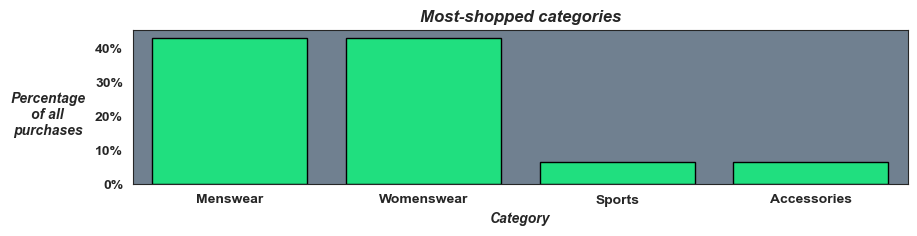

In [17]:
# Plot: Number of purchases by category (as % of total)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter     # import necessary library used to add percent sign to tick labels
def to_percent(tick_value, position):    # define formatting function which takes the value of each tick as an arg
    s = str(int(tick_value))    # converts tick_value to sting...
    return s + '%'              # so it can be concatenated with "%"
category_counts = sales['Product_Category'].value_counts(normalize=True) * 100  # calculate the percentage of purchase count by each category
category_percentage = category_counts.reset_index()  # convert the series to dataframe (with the two columns below) for plotting
category_percentage.columns = ['Category', 'Percentage']
f, ax = plt.subplots(figsize=(10, 2))  # set up plot and styles
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')
sns.barplot(x="Category", y="Percentage", data=category_percentage, color='springgreen', edgecolor='black', ax=ax)  # create the plot
ax.set_title('Most-shopped categories', fontsize=12, weight='bold', style='italic', y=1)  # set overall plot title
ax.set_xlabel('Category', weight='bold', style='italic', size=10)# set y label
ax.set_ylabel('Percentage\nof all\npurchases', weight='bold', style='italic', size=10, rotation=0)  # customize the y-axis label
ax.get_yaxis().set_label_coords(-0.11,0.30)  # Adjust y-axis label position
ax.set_facecolor('slategray')  # set background color
for label in ax.get_xticklabels(): label.set_weight('bold')  # customize x-axis tick labels
for label in ax.get_yticklabels(): label.set_weight('bold')  # customize y-axis tick labels
formatter = FuncFormatter(to_percent)
ax.yaxis.set_major_formatter(formatter)  # apply the formatting function to add % signs to y-axis
plt.show()  # show the plot

In [ ]:
# plotting distribution of ages
f, ax = plt.subplots(figsize=(10, 2))   # set up plot and styles
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')
sns.countplot(x="Age Range", data=shopping, color='cyan', ax=ax) # establish the plot
ax.set_title('Number of customers by age range', fontsize=14, weight='bold', style='italic', y=1)
ax.set_xlabel('Age', weight='bold', style='italic', size=12)                 # x label
ax.set_ylabel('Customer Count', weight='bold', style='italic', size=12)      # y label
ax.set_facecolor('slategray')             # background color
for label in ax.get_xticklabels(): label.set_weight('bold')     # x-axis tick labels
for label in ax.get_yticklabels(): label.set_weight('bold')     # y-axis tick labels
plt.show()